<font size=10em>statistics python</font>

# preparation

In [1]:
import os
from pathlib import Path
from glob import glob
from tqdm.notebook import tqdm

import json
from slack_sdk import WebClient

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
sns.set(font='IPAexGothic', context='talk')

In [2]:
# import data from seabon
df = sns.load_dataset("tips")
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


# descriptive statistics

## distribution

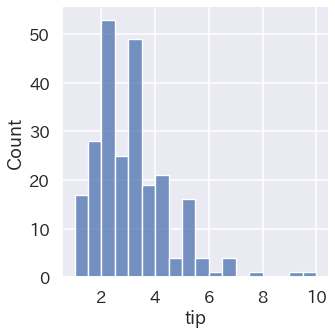

In [4]:
# Histograms are used for continuous variables
sns.displot(data=df['tip'])

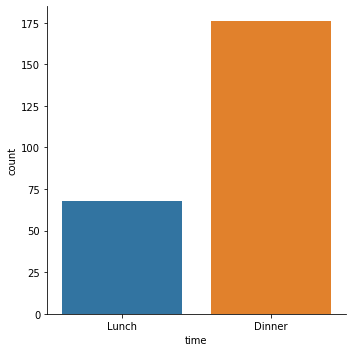

In [5]:
# Histograms are used for categorical variables
sns.catplot(x='time', data=df, kind='count')

## mean

In [6]:
np.mean(df['tip'])

2.9982786885245902

In [7]:
np.mean(df['tip_rate'])

0.16080258172250478

In [8]:
df['tip_rate'].mean()

0.16080258172250478

In [9]:
df.groupby('sex').mean()

,total_bill,tip,size,tip_rate
sex,,,,
Male,20.744076,3.089618,2.630573,0.157651
Female,18.056897,2.833448,2.459770,0.166491


In [10]:
df.groupby('sex').mean()['tip_rate']

sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

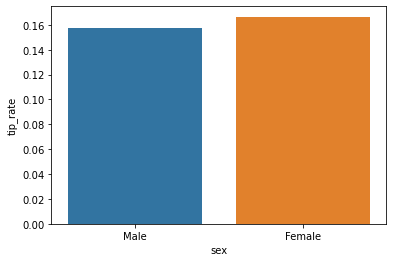

In [11]:
sns.barplot(x='sex', y='tip_rate', data=df, ci=None)

<AxesSubplot:xlabel='sex'>

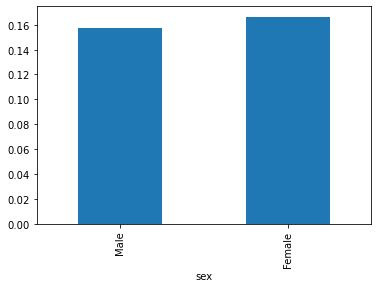

In [12]:
df.groupby('sex').mean()['tip_rate'].plot(kind='bar')

## median

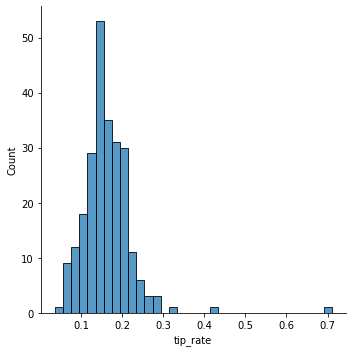

In [13]:
sns.displot(df['tip_rate'])

In [12]:
np.median(df['tip_rate'])

0.15476977125802577

In [13]:
df['tip_rate'].median()

0.15476977125802577

In [14]:
df.groupby('sex').median()

,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2,0.153492
Female,16.40,2.75,2,0.155581


<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

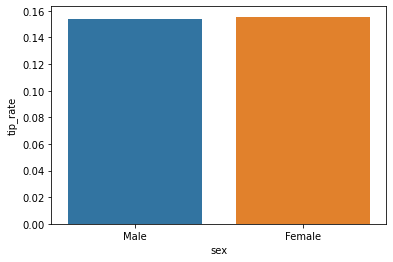

In [15]:
sns.barplot(x='sex', y='tip_rate', data=df, estimator=np.median, ci=None)

In [16]:
df.sort_values('tip_rate', ascending=False)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433


## mode

In [17]:
mode, count = stats.mode(df)

In [18]:
ptrint(mode)
print(count)

[[13.42 2.0 'Male' 'No' 'Sat' 'Dinner' 2 0.1448225923244026]]
[[  3  33 157 151  87 176 156   2]]


In [19]:
df['size'].mode()

0    2
dtype: int64

## range